In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# PyDWI

> Fast ADC and DKI maps from DWI.

## Install

`pip install pydwi`

## How to use

`PyDWI` supports interactive usage __only__ at the moment. Command-line usage is planned for the future.

In [ ]:
from PyDWI.core import DWIDataset, get_ADC_dataset, get_DKI_dataset, save_nii, show

First, instantiate a `DWIDataset` class:

In [ ]:
data = DWIDataset("1.dcm")

Loading and rescaling...
Successfully loaded Dataset


You can have get information about the dataset by printing `data.info`

In [ ]:
print(data.info)

DICOMDataset with 185 slices in groups of 5 slices each
        rescaled with slope 1.7836 and intercept 0.0000.


You can get information about the logical slice groups using `data.slice_groups`

In [ ]:
data.slice_groups

[SliceGroup at position [-83.12] with instance numbers [4 8 12 16 20],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-80.12] with instance numbers [24 28 32 36 40],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-77.12] with instance numbers [44 48 52 56 60],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-74.12] with instance numbers [64 68 72 76 80],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-71.12] with instance numbers [84 88 92 96 100],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-68.12] with instance numbers [104 108 112 116 120],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-65.12] with instance numbers [124 128 132 136 140],
                  b_values [0 50 300 600 1000] and 5 slices.,
 SliceGroup at position [-62.12] with instance

`len(slice_groups)` gives you the number of usable slices

In [ ]:
len(data.slice_groups)

37

You can get additional information on the slice groups:

In [ ]:
data.slice_groups[0]

SliceGroup at position [-83.12] with instance numbers [4 8 12 16 20],
                 b_values [0 50 300 600 1000] and 5 slices.

You can see some slices by calling `show`:

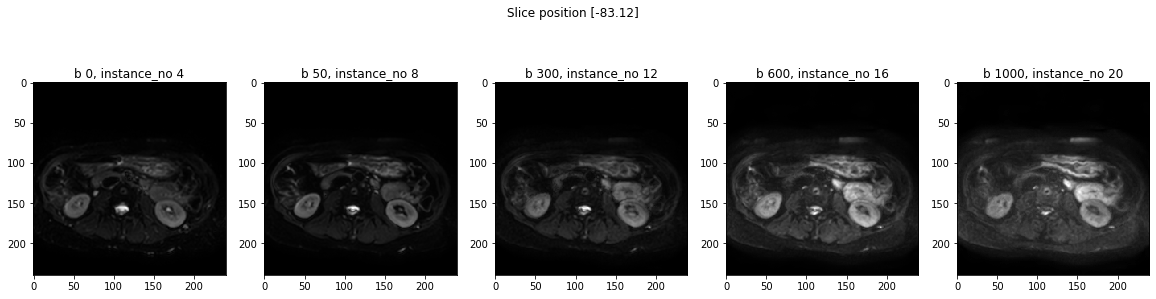

In [ ]:
data.slice_groups[0].show()

You can get ADC maps by calling `get_ADC_dataset`. By default this runs in parallel and is quite fast.

In [ ]:
%%time
ADC_maps = get_ADC_dataset(data)

CPU times: user 2.32 s, sys: 42.3 ms, total: 2.36 s
Wall time: 310 ms


You can get DKI maps by calling `get_DKI_dataset`. This also runs in parallel but takes around 10 minutes per dataset for around 30 slices.

In [ ]:
%%time
D_maps, K_maps = get_DKI_dataset(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


CPU times: user 1.11 s, sys: 304 ms, total: 1.41 s
Wall time: 10min 1s


[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed: 10.0min finished


You can have a look at slices by calling `show` which is a utility function

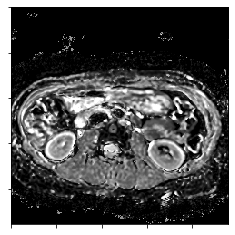

In [ ]:
show(D_maps[0])

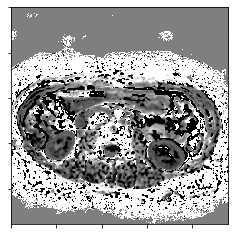

In [ ]:
show(K_maps[0])

Finally, you can save `.nii.gz` files by calling `save_nii` and providing a filename without the `nii.gz`.

In [ ]:
save_nii(D_maps, "D_maps")